### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных


##### Студент:  Щербак Маргарита Романовна
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 18

Cylinder Bands Data Set  

Название файла: bands.data

Ссылка: http://archive.ics.uci.edu/ml/datasets/Cylinder+Bands  

Класс: band type (столбец No 40)

Метод отбора признаков – рекурсивное исключение признаков (RFE)

Модели классификации:

- наивный байесовский классификатор

- классификатор логистической регрессии    

- классификатор логистической регрессии с полиномиальной зависимостью (degree=2)

Кривая для визуализации - PR-кривая

**Задание 1**  
Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [3]:
import pandas as pd

data = pd.read_csv('bands.data', header=None)

X = data.iloc[:, :-1]  # Все столбцы, кроме последнего
y = data.iloc[:, -1]   # Последний столбец с метками классов
y.columns = ['band type']

print(X) # все признаки
print(y) # метки классов


           0     1        2      3    4    5    6       7         8   \
0    19910108  X126  TVGUIDE  25503  YES  KEY  YES  BENTON  GALLATIN   
1    19910109  X266  TVGUIDE  25503  YES  KEY  YES  BENTON  GALLATIN   
2    19910104    B7   MODMAT  47201  YES  KEY  YES  BENTON  GALLATIN   
3    19910104  T133   MASSEY  39039  YES  KEY  YES  BENTON  GALLATIN   
4    19910111   J34    KMART  37351   NO  KEY  YES  BENTON  GALLATIN   
..        ...   ...      ...    ...  ...  ...  ...     ...       ...   
536  19941005  aa66    kmart  85813    ?  key    ?       ?  gallatin   
537  19941009   j44     best  38064    ?  key    ?       ?  gallatin   
538  19941009  aa58    kmart  85814    ?  key    ?       ?  gallatin   
539  19941010  aa70    kmart  85814    ?  key    ?       ?  gallatin   
540  19941010   j70     best  38064    ?  key    ?       ?  gallatin   

           9   ...    29    30 31 32   33   34  35  36      37   38  
0    UNCOATED  ...  50.5  36.4  0  0  2.5    1  34  40     105  1

**Задание 2**  
Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.

In [4]:
print("Записи с пропущенными метками класса в y:")
print(y[y.isna()])

Записи с пропущенными метками класса в y:
521    NaN
522    NaN
Name: 39, dtype: object


In [8]:
original_row_count = data.shape[0]

# Удаление записей с пропущенными метками класса или метками равными '?'
data = data[~y.isin(['?', None]) & y.notnull()]
y = y[~y.isin(['?', None]) & y.notnull()]

print("Записи с пропущенными метками класса в y:")
print(y[y.isna()])

# Проверка на наличие пустых значений
missing_data = data[data.isna().any(axis=1)]
if not missing_data.empty:
    print("\nЗаписи с пропущенными значениями в DataFrame:")
    print(missing_data)
else:
    print("\nНет записей с пропущенными значениями.")

unique_classes = y.value_counts()
print("\nУникальные классы и их количество:")
print(unique_classes)

initial_unique_classes = y.value_counts()

# Сохранение количества уникальных классов
initial_class_count = len(initial_unique_classes)
final_class_count = len(unique_classes)

# Проверка, если классов больше двух
if len(unique_classes) > 2:
    major_class = unique_classes.idxmax()  # Находим мажоритарный класс
    y = y.apply(lambda x: major_class if x == major_class else 'another')

data.iloc[:, -1] = y.values
final_row_count = data.shape[0]

print("\nИзначальное количество строк:", original_row_count)
print("Итоговое количество строк:", final_row_count)

print("\nКоличество уникальных классов до обработки:", initial_class_count)
print("Количество уникальных классов после обработки:", final_class_count)
print(data)


Записи с пропущенными метками класса в y:
Series([], Name: 39, dtype: object)

Нет записей с пропущенными значениями.

Уникальные классы и их количество:
39
noband    312
band      227
Name: count, dtype: int64

Изначальное количество строк: 539
Итоговое количество строк: 539

Количество уникальных классов до обработки: 2
Количество уникальных классов после обработки: 2
           0     1        2      3    4    5    6       7         8   \
0    19910108  X126  TVGUIDE  25503  YES  KEY  YES  BENTON  GALLATIN   
1    19910109  X266  TVGUIDE  25503  YES  KEY  YES  BENTON  GALLATIN   
2    19910104    B7   MODMAT  47201  YES  KEY  YES  BENTON  GALLATIN   
3    19910104  T133   MASSEY  39039  YES  KEY  YES  BENTON  GALLATIN   
4    19910111   J34    KMART  37351   NO  KEY  YES  BENTON  GALLATIN   
..        ...   ...      ...    ...  ...  ...  ...     ...       ...   
536  19941005  aa66    kmart  85813    ?  key    ?       ?  gallatin   
537  19941009   j44     best  38064    ?  key    ? 

В моем случае столбец с метками классов содержит ровно два класса

Так я выполнила очистку столбца с метками классов

In [9]:
print(y.unique())

['band' 'noband']


**Задание 3**  
Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.

In [10]:
# Проверим типы данных
print(data.dtypes)

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16    float64
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
dtype: object


In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
537,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
538,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
539,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [14]:
import numpy as np

# Заменяем все нечисловые значения на NaN
data.replace(r'^[?]+$', np.nan, regex=True, inplace=True)

# Преобразуем только числовые признаки в числовой тип
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='raise')
    except ValueError:
        continue

In [15]:
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,band
537,19941009,j44,best,38064,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,band
538,19941009,aa58,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,band
539,19941010,aa70,kmart,85814,NaN,key,NaN,NaN,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,band


Теперь удалим столбцы с признаками, в которых есть текстовые данные

In [16]:
# Удаляем столбцы с текстовыми (категориальными) значениями
data_numeric = data.select_dtypes(include=[np.number])

# Сохраняем столбец с метками классов
data_numeric['class'] = data[39]

print("DataFrame после удаления текстовых признаков:")
print(data_numeric.head())

print("\nОставшиеся столбцы после удаления:")
print(data_numeric.columns)


DataFrame после удаления текстовых признаков:
          0      3   15   16      19    20    21     22    23    24  ...  \
0  19910108  25503  821  2.0  1911.0  55.0  46.0  0.200  17.0  78.0  ...   
1  19910109  25503  821  2.0     NaN  55.0  46.0  0.300  15.0  80.0  ...   
2  19910104  47201  815  9.0     NaN  62.0  40.0  0.433  16.0  80.0  ...   
3  19910104  39039  816  9.0  1910.0  52.0  40.0  0.300  16.0  75.0  ...   
4  19910111  37351  816  2.0  1910.0  50.0  46.0  0.300  17.0  80.0  ...   

     30   31   32   33   34    35    36      37     38   class  
0  36.4  0.0  0.0  2.5  1.0  34.0  40.0  105.00  100.0    band  
1  38.5  0.0  0.0  2.5  0.7  34.0  40.0  105.00  100.0  noband  
2  39.8  0.0  0.0  2.8  0.9  40.0  40.0  103.87  100.0  noband  
3  38.8  0.0  0.0  2.5  1.3  40.0  40.0  108.06  100.0  noband  
4  42.5  5.0  0.0  2.3  0.6  35.0  40.0  106.67  100.0  noband  

[5 rows x 25 columns]

Оставшиеся столбцы после удаления:
Index([      0,       3,      15,      16,      

In [17]:
data_numeric

,0,3,15,16,19,20,21,22,23,24,...,30,31,32,33,34,35,36,37,38,class
0,19910108,25503,821,2.0,1911.0,55.0,46.0,0.200,17.0,78.0,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
1,19910109,25503,821,2.0,NaN,55.0,46.0,0.300,15.0,80.0,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,noband
2,19910104,47201,815,9.0,NaN,62.0,40.0,0.433,16.0,80.0,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,noband
3,19910104,39039,816,9.0,1910.0,52.0,40.0,0.300,16.0,75.0,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
4,19910111,37351,816,2.0,1910.0,50.0,46.0,0.300,17.0,80.0,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,85813,827,9.0,1910.0,NaN,52.0,NaN,18.0,82.0,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,band
537,19941009,38064,815,1.0,1910.0,NaN,NaN,0.200,16.1,76.0,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,band
538,19941009,85814,827,2.0,1910.0,NaN,NaN,0.300,16.5,70.0,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,band
539,19941010,85814,828,2.0,1910.0,NaN,46.0,0.267,16.4,76.0,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,band


Остались пропуски, поэтому заменяем пропущенные значения на средние значения для положительного (band) и отрицательного (noband) классов.

In [18]:
# Добавляем столбец с метками классов
data['class'] = data.iloc[:, 39]

# Вычисляем средние значения для положительного и отрицательного классов
mean_values = data.groupby('class').mean(numeric_only=True)

print("Средние значения для классов:")
print(mean_values)


Средние значения для классов:
                  0             3           15        16           19  \
class                                                                   
band    1.991136e+07  37853.281938  817.224670  4.590308  1910.386364   
noband  1.990514e+07  36875.576923  817.983974  5.096154  1910.348837   

               20         21        22         23         24  ...         29  \
class                                                         ...              
band    45.563889  51.666667  0.273933  15.429295  79.546256  ...  56.536337   
noband  44.724590  50.439103  0.277185  15.308903  77.803859  ...  55.143590   

               30        31        32        33        34         35  \
class                                                                  
band    38.327907  0.900289  0.023121  2.378027  1.010181  35.612717   
noband  38.699808  1.553226  0.046474  2.417419  0.971543  34.310897   

               36          37         38  
class                   

In [20]:
data_filled = data_numeric.copy()

# Получаем средние значения для положительного и отрицательного классов
means = data_filled.groupby('class').mean()

# Заменяем пропущенные значения
for col in data_filled.columns[:-1]:  # Пробегаем по всем столбцам, кроме последнего (class)
    data_filled[col] = data_filled[col].fillna(
        data_filled[data_filled['class'] == 'band'][col].mean() if 'band' in means.index else 0
    ).fillna(
        data_filled[data_filled['class'] == 'noband'][col].mean() if 'noband' in means.index else 0
    )

print("После заполнения пропусков средними значениями:")
print(data_filled.head())

print("\nПроверка на наличие пропусков:")
print(data_filled.isna().sum())


После заполнения пропусков средними значениями:
          0      3   15   16           19    20    21     22    23    24  ...  \
0  19910108  25503  821  2.0  1911.000000  55.0  46.0  0.200  17.0  78.0  ...   
1  19910109  25503  821  2.0  1910.386364  55.0  46.0  0.300  15.0  80.0  ...   
2  19910104  47201  815  9.0  1910.386364  62.0  40.0  0.433  16.0  80.0  ...   
3  19910104  39039  816  9.0  1910.000000  52.0  40.0  0.300  16.0  75.0  ...   
4  19910111  37351  816  2.0  1910.000000  50.0  46.0  0.300  17.0  80.0  ...   

     30   31   32   33   34    35    36      37     38   class  
0  36.4  0.0  0.0  2.5  1.0  34.0  40.0  105.00  100.0    band  
1  38.5  0.0  0.0  2.5  0.7  34.0  40.0  105.00  100.0  noband  
2  39.8  0.0  0.0  2.8  0.9  40.0  40.0  103.87  100.0  noband  
3  38.8  0.0  0.0  2.5  1.3  40.0  40.0  108.06  100.0  noband  
4  42.5  5.0  0.0  2.3  0.6  35.0  40.0  106.67  100.0  noband  

[5 rows x 25 columns]

Проверка на наличие пропусков:
0        0
3        

In [21]:
data_filled

,0,3,15,16,19,20,21,22,23,24,...,30,31,32,33,34,35,36,37,38,class
0,19910108,25503,821,2.0,1911.000000,55.000000,46.000000,0.200000,17.0,78.0,...,36.400000,0.000000,0.000000,2.5,1.0,34.000000,40.0,105.00,100.0,band
1,19910109,25503,821,2.0,1910.386364,55.000000,46.000000,0.300000,15.0,80.0,...,38.500000,0.000000,0.000000,2.5,0.7,34.000000,40.0,105.00,100.0,noband
2,19910104,47201,815,9.0,1910.386364,62.000000,40.000000,0.433000,16.0,80.0,...,39.800000,0.000000,0.000000,2.8,0.9,40.000000,40.0,103.87,100.0,noband
3,19910104,39039,816,9.0,1910.000000,52.000000,40.000000,0.300000,16.0,75.0,...,38.800000,0.000000,0.000000,2.5,1.3,40.000000,40.0,108.06,100.0,noband
4,19910111,37351,816,2.0,1910.000000,50.000000,46.000000,0.300000,17.0,80.0,...,42.500000,5.000000,0.000000,2.3,0.6,35.000000,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,85813,827,9.0,1910.000000,45.563889,52.000000,0.273933,18.0,82.0,...,38.327907,0.900289,0.023121,1.0,1.0,35.612717,40.0,112.50,100.0,band
537,19941009,38064,815,1.0,1910.000000,45.563889,51.666667,0.200000,16.1,76.0,...,38.327907,0.900289,0.023121,0.0,0.0,35.612717,40.0,110.00,100.0,band
538,19941009,85814,827,2.0,1910.000000,45.563889,51.666667,0.300000,16.5,70.0,...,38.327907,0.900289,0.023121,2.7,2.8,35.612717,40.0,108.00,100.0,band
539,19941010,85814,828,2.0,1910.000000,45.563889,46.000000,0.267000,16.4,76.0,...,38.327907,0.900289,0.023121,1.5,2.3,35.612717,40.0,108.00,100.0,band


In [22]:
# Просмотр уникальных значений в каждом числовом столбце
for col in data_filled.columns[:-1]:  # Пропускаем последний столбец (class)
    print(f"Уникальные значения в столбце {col}: {data_filled[col].unique()}")


Уникальные значения в столбце 0: [19910108 19910109 19910104 19910111 19910112 19910114 19910117 19910125
 19910103 19910129 19910123 19910130 19910127 19910131 19910201 19910118
 19910206 19910208 19910211 19910215 19910113 19910213 19910212 19910214
 19910221 19910223 19910220 19910216 19910304 19910303 19910301 19910309
 19910306 19910311 19910227 19910302 19910307 19910308 19910310 19910317
 19910314 19910316 19910318 19910319 19910322 19910325 19910320 19910323
 19910402 19910404 19910330 19910405 19910327 19910406 19910511 19910501
 19910502 19910503 19910507 19910508 19910517 19910505 19910409 19910415
 19910416 19910426 19910422 19910428 19910419 19910430 19910423 19910605
 19910604 19910603 19910529 19910524 19910531 19910528 19910610 19910611
 19910614 19910627 19910626 19910622 19910619 19910618 19910617 19910609
 19910607 19910707 19910629 19910706 19900514 19900509 19900511 19900518
 19900414 19900418 19900606 19900507 19900409 19900524 19900425 19900417
 19900517 19900426

Итак, я обработала данные:

- Преобразованы все числовые значения.
- Удалены ненужные категориальные признаки.
- Пропущенные значения заменены на средние для каждого класса.

**Задание 4**  
Выполните стандартизацию признаков набора данных.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Стандартизируем только числовые признаки
data_standardized = scaler.fit_transform(data_filled.iloc[:, :-1])  # Все столбцы кроме последнего
data_standardized = pd.DataFrame(data_standardized, columns=data_filled.columns[:-1])
data_standardized['class'] = data_filled['class'].values  # Добавляем метки классов

print("Стандартизированные данные:")
print(data_standardized)


Стандартизированные данные:
            0         3        15        16        19        20        21  \
0    0.277486 -1.350022  0.448417 -0.887546  1.340920  1.156249 -0.618417   
1    0.277604 -1.350022  0.448417 -0.887546  0.044282  1.156249 -0.618417   
2    0.277013  1.135716 -0.358135  1.267351  0.044282  1.972888 -1.367092   
3    0.277013  0.200672 -0.223709  1.267351 -0.772120  0.806261 -1.367092   
4    0.277840  0.007293 -0.223709 -0.887546 -0.772120  0.572935 -0.618417   
..        ...       ...       ...       ...       ...       ...       ...   
534  3.927029  5.559134  1.254968  1.267351 -0.772120  0.055406  0.130258   
535  3.927502  0.088975 -0.358135 -1.195388 -0.772120  0.055406  0.088665   
536  3.927502  5.559248  1.254968 -0.887546 -0.772120  0.055406  0.088665   
537  3.927620  5.559248  1.389393 -0.887546 -0.772120  0.055406 -0.618417   
538  3.927620  0.088975 -0.358135 -1.195388 -0.772120  0.055406 -0.618417   

           22        23        24  ...        3

**Задание 5**  
Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

рекурсивное исключение признаков (RFE)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Отбор числовых признаков с более чем 10 уникальными значениями
X = data_standardized.drop(columns=['class'])
X_filtered = X.loc[:, X.nunique() > 10]  # оставляем только те, у которых более 10 уникальных значений
y = data_standardized['class']

model = LogisticRegression(max_iter=10000, solver='saga')

# Инициализируем RFE с выбором 2 наиболее значимых признаков
rfe = RFE(estimator=model, n_features_to_select=2)
fit = rfe.fit(X_filtered, y)

# Получаем отобранные признаки
selected_features = X_filtered.columns[fit.support_]
selected_feature_names = selected_features.tolist()

print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % selected_features.tolist())

# Проверка уникальных значений для отобранных признаков
unique_values = {feature: data_filled[feature].nunique() for feature in selected_features}
print("Уникальные значения для отобранных признаков:", unique_values)

selected_indices = [i for i, x in enumerate(fit.support_) if x]
print("Индексы отобранных признаков:", selected_indices)


Число признаков: 2
Выбранные признаки: [0, 28]
Уникальные значения для отобранных признаков: {0: 295, 28: 83}
Индексы отобранных признаков: [0, 10]


**Задание 6**  
Визуализируйте набор данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описанию набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


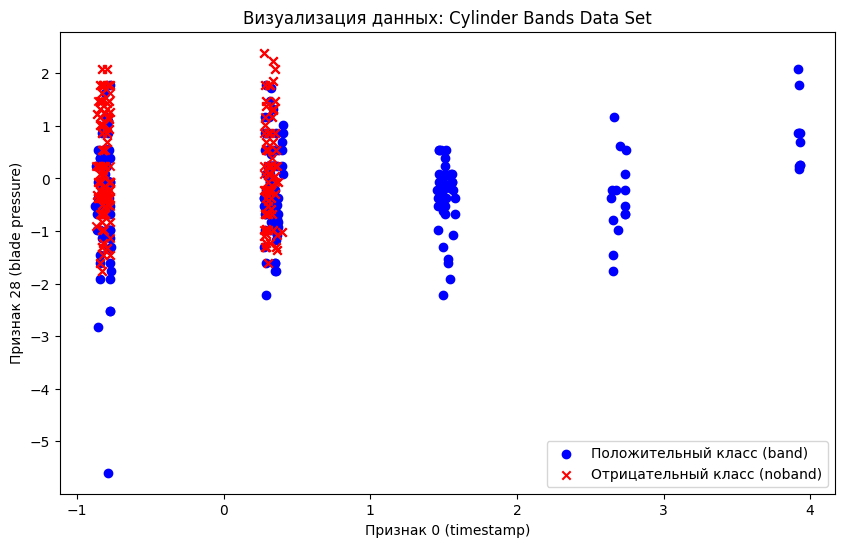

In [25]:
import matplotlib.pyplot as plt

class_positive = data_standardized[data_standardized['class'] == 'band']
class_negative = data_standardized[data_standardized['class'] == 'noband']

plt.figure(figsize=(10, 6))
x_feature = selected_feature_names[0]
y_feature = selected_feature_names[1]

# Построение точек для положительного класса
plt.scatter(class_positive[x_feature], class_positive[y_feature],
            color='blue', marker='o', label='Положительный класс (band)')

# Построение точек для отрицательного класса
plt.scatter(class_negative[x_feature], class_negative[y_feature],
            color='red', marker='x', label='Отрицательный класс (noband)')

plt.ylabel('Признак 28 (blade pressure)')
plt.xlabel('Признак 0 (timestamp)')
plt.title('Визуализация данных: Cylinder Bands Data Set')
plt.legend()
plt.show()


**Задание 7**  
Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.

Модели классификации:
- наивный байесовский классификатор
- классификатор логистической регрессии
- классификатор логистической регрессии с полиномиальной зависимостью (degree=2)

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_filled.iloc[:, [0, 10]])  # набор данных из двух признаков
data_standardized = pd.DataFrame(data_standardized, columns=['feature_0', 'feature_28'])
data_standardized['class'] = data_filled['class'].values

# Преобразование меток классов в бинарные значения (band будет 1, noband будет 0)
data_standardized['class'] = data_standardized['class'].map({'band': 1, 'noband': 0})

X = data_standardized.iloc[:, :-1]  # Все признаки, кроме меток классов
y = data_standardized['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Наивный байесовский классификатор
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# Логистическая регрессия
lr_model = LogisticRegression(max_iter=10000, solver='saga')
lr_model.fit(X_train_balanced, y_train_balanced)

# Логистическая регрессия с полиномиальной зависимостью (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_balanced)
X_test_poly = poly.transform(X_test)

lr_poly_model = LogisticRegression(max_iter=10000, solver='saga')
lr_poly_model.fit(X_train_poly, y_train_balanced)

def evaluate_model(model, X_test, y_test, model_name):
    # Прогнозирование
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]

    # Метрики
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Average Precision
    avg_precision = average_precision_score(y_test, y_scores)
    print(f"Average Precision (AP) for {model_name}: {avg_precision:.2f}")


evaluate_model(nb_model, X_test, y_test, "Наивный байесовский классификатор")
evaluate_model(lr_model, X_test, y_test, "Логистическая регрессия")
evaluate_model(lr_poly_model, X_test_poly, y_test, "Логистическая регрессия с полиномиальной зависимостью (degree=2)")


Наивный байесовский классификатор Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        98
           1       0.67      0.44      0.53        64

    accuracy                           0.69       162
   macro avg       0.68      0.65      0.65       162
weighted avg       0.69      0.69      0.67       162

Average Precision (AP) for Наивный байесовский классификатор: 0.67
Логистическая регрессия Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        98
           1       0.46      0.64      0.53        64

    accuracy                           0.56       162
   macro avg       0.57      0.57      0.55       162
weighted avg       0.59      0.56      0.56       162

Average Precision (AP) for Логистическая регрессия: 0.66
Логистическая регрессия с полиномиальной зависимостью (degree=2) Classification Report:
              precision    rec

Даже после отбора значимых признаков данные, видимо, оказались сложными. Возможно, два выбранных признака не обеспечивают достаточной информации для построения качественной модели. Поэтому на основе проведенной стандартизации и отбора признаков результаты с AP около 0.3 были. Это плохой показатель. Для улучшения я решила попробовать сбалансировать данные, использовала метод oversampling — SMOTE, который действительно улучшил показатели.

**Задание 8**   
Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.

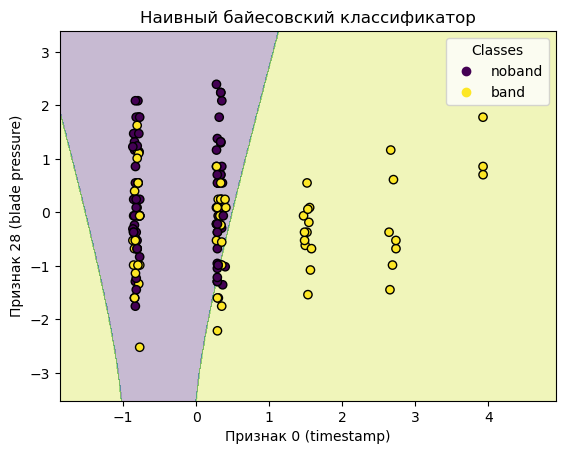

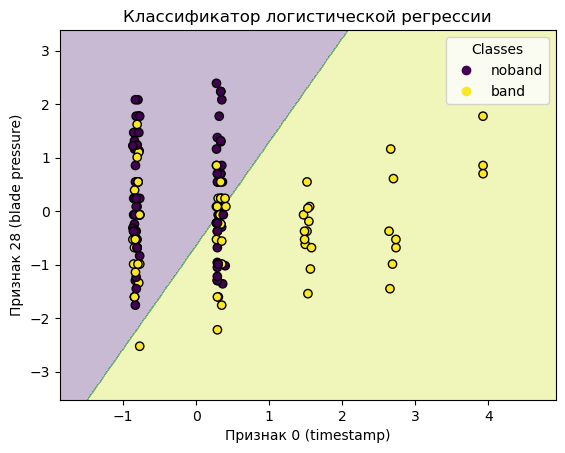

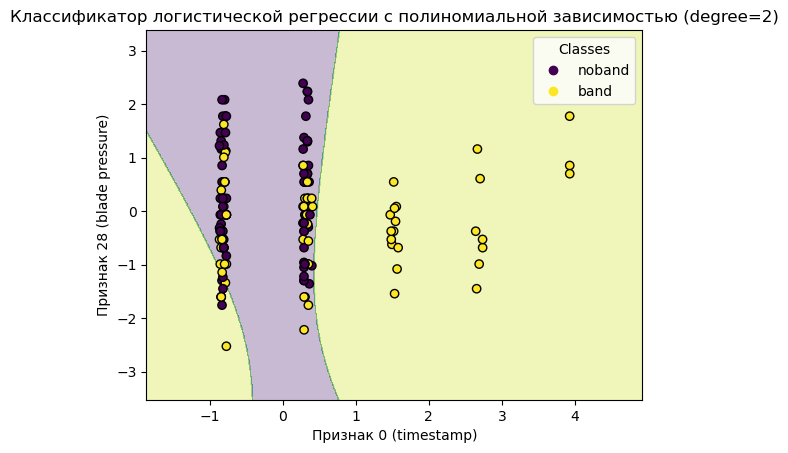

In [ ]:
def plot_decision_boundary(model, X, y, title, x_feature, y_feature):
    if X.shape[1] != 2:
        raise ValueError("Для визуализации границ принятия решения необходимо использовать только два признака.")

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Предсказания модели
    try:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    except Exception as e:
        print("Ошибка при предсказании:", e)
        return

    y_numeric = np.where(y == 'band', 1, 0)  # Преобразуем 'band' в 1, 'noband' в 0
    Z_numeric = np.where(Z == 'band', 1, 0)  # Преобразуем строковые метки в числовые
    if not np.all(np.isfinite(Z_numeric)):
        print("Недопустимые значения в предсказаниях Z:", Z_numeric)
        return

    Z_numeric = Z_numeric.reshape(xx.shape)

    plt.contourf(xx, yy, Z_numeric, alpha=0.3)
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_numeric, edgecolors='k', marker='o')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.xlabel('Признак 0 (timestamp)')
    plt.ylabel('Признак 28 (blade pressure)')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['noband', 'band'], title="Classes")
    plt.show()

plot_decision_boundary(nb_model, X_test, y_test, "Наивный байесовский классификатор", selected_feature_names[0], selected_feature_names[1])
plot_decision_boundary(lr_model, X_test, y_test, "Классификатор логистической регрессии", selected_feature_names[0], selected_feature_names[1])
plot_decision_boundary(lr_poly_model, X_test, y_test, "Классификатор логистической регрессии с полиномиальной зависимостью (degree=2)", selected_feature_names[0], selected_feature_names[1])


**Задание 9**  
Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.
Кривая для визуализации - PR-кривая

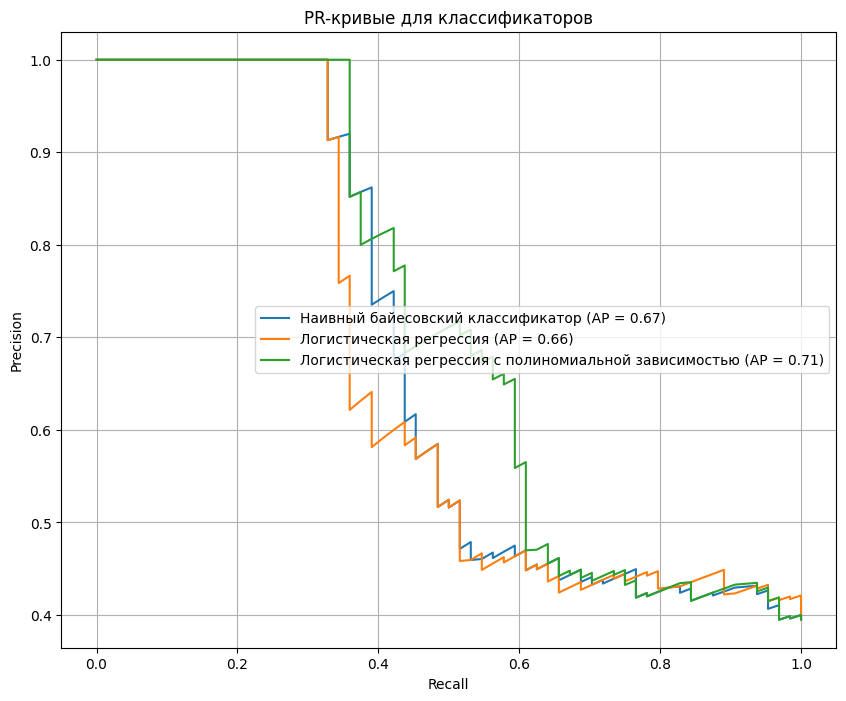

In [27]:
models = [
    ('Наивный байесовский классификатор', nb_model, X_test),
    ('Логистическая регрессия', lr_model, X_test),
    ('Логистическая регрессия с полиномиальной зависимостью', lr_poly_model, X_test_poly)
]

plt.figure(figsize=(10, 8))

for name, model, X_t in models:
    y_scores = model.predict_proba(X_t)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, label=f'{name} (AP = {average_precision:.2f})')

# Оформление графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривые для классификаторов')
plt.legend()
plt.grid(True)
plt.show()


**Задание 10**  
Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

In [37]:
best_model_name = None
best_AUC = 0

y_test_numeric = np.where(y_test == 1, 1, 0)  # Здесь 1 — положительный класс ('band')

for name, model, X_t in models:
    y_scores = model.predict_proba(X_t)[:, 1]
    average_precision = average_precision_score(y_test_numeric, y_scores)

    if average_precision > best_AUC:
        best_AUC = average_precision
        best_model_name = name

print(f'Лучший метод классификации: {best_model_name} с AUC-PR = {best_AUC:.2f}')


Лучший метод классификации: Логистическая регрессия с полиномиальной зависимостью с AUC-PR = 0.71
